In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv


Intial research shows causes of strokes includes smoking, heart disease, diabetes, etc. with age chances of strokes increases(>55).

In [2]:
#GETTING THE DATA
raw_data = pd.read_csv('../input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv')

In [3]:
raw_data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
raw_data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


bmi-> missing values.
only about 4% of patient have stroke -> huge data imbalance.


array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'hypertension'}>],
       [<AxesSubplot:title={'center':'heart_disease'}>,
        <AxesSubplot:title={'center':'avg_glucose_level'}>,
        <AxesSubplot:title={'center':'bmi'}>],
       [<AxesSubplot:title={'center':'stroke'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

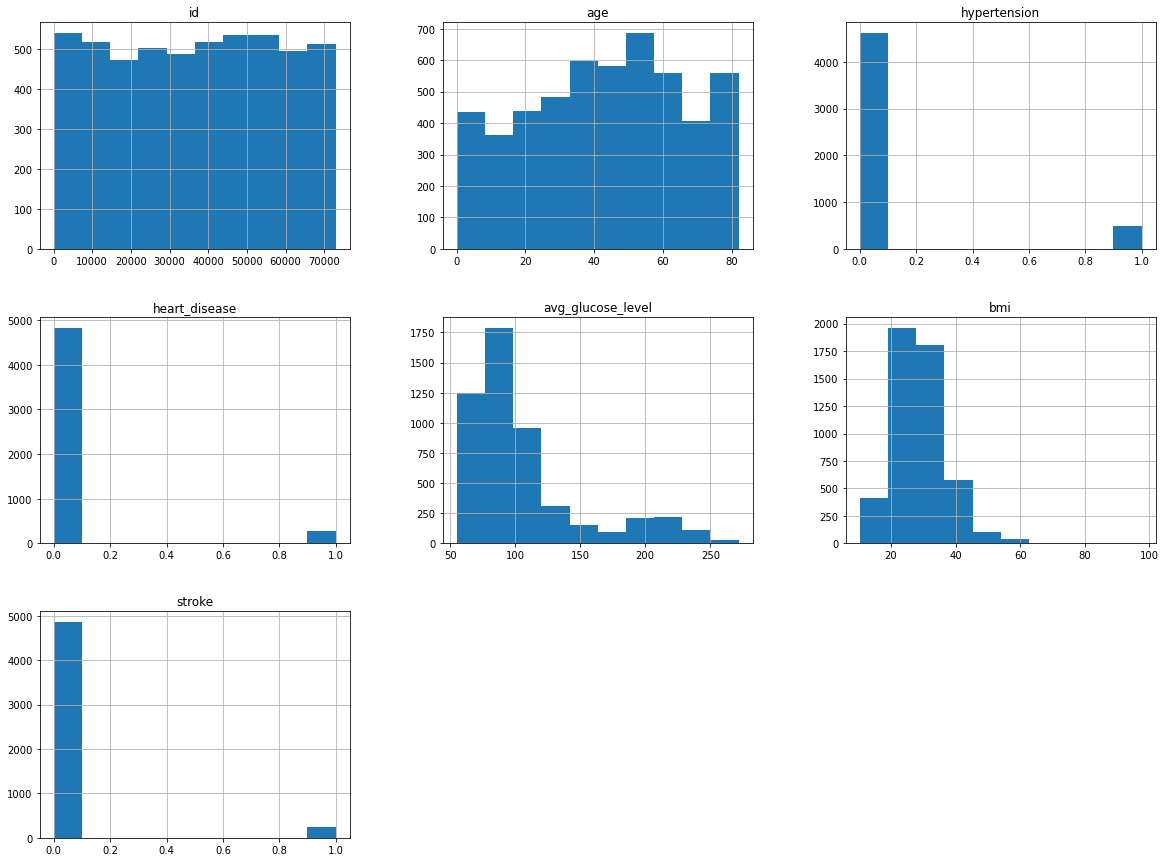

In [6]:
raw_data.hist(figsize=(20,15))

In [7]:
#setting test data aside

from sklearn.model_selection import train_test_split

train , test  = train_test_split(raw_data,random_state = 42);

In [8]:
import seaborn as sns
sns.set_style('darkgrid')

<AxesSubplot:xlabel='age', ylabel='Count'>

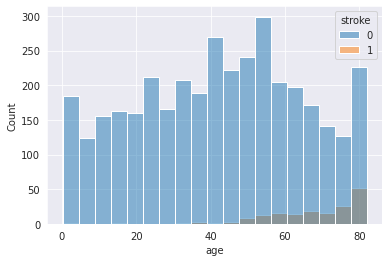

In [9]:
sns.histplot(x='age',data=train,hue = 'stroke',)

(0.0, 50.0)

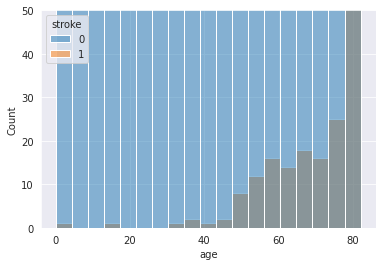

In [10]:
import matplotlib.pyplot as plt
#zooming a little bit
sns.histplot(x='age',data=train,hue = 'stroke')
plt.ylim(0,50)

1. WE can clearly see after age 45-50 chances of stokes increase drastically with age

<AxesSubplot:xlabel='avg_glucose_level', ylabel='Count'>

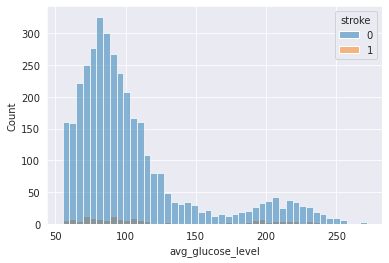

In [11]:
sns.histplot(x='avg_glucose_level',data=train,hue = 'stroke')

(0.0, 15.0)

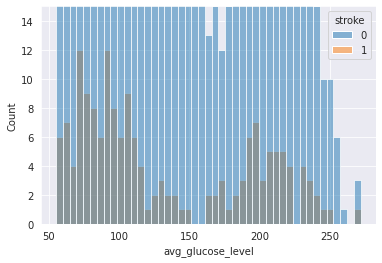

In [12]:
sns.histplot(x='avg_glucose_level',data=train,hue = 'stroke')
plt.ylim(0,15)

<AxesSubplot:xlabel='bmi', ylabel='Count'>

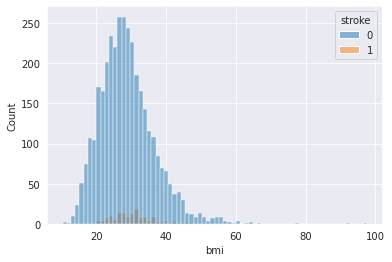

In [13]:
sns.histplot(x='bmi',data=train,hue = 'stroke')

(0.0, 25.0)

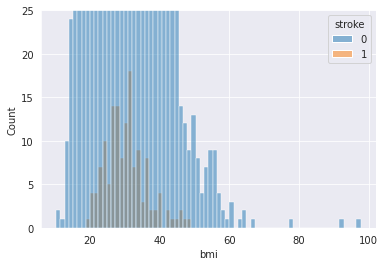

In [14]:
sns.histplot(x='bmi',data=train,hue = 'stroke')
plt.ylim(0,25)

<AxesSubplot:xlabel='heart_disease', ylabel='age'>

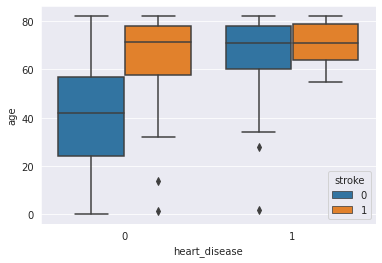

In [15]:
sns.boxplot(x='heart_disease',y='age',data=train,hue = 'stroke')

age>50 -> heart disease. clearly age is major factor in strokes

<AxesSubplot:xlabel='heart_disease', ylabel='bmi'>

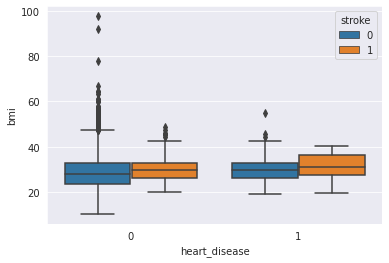

In [16]:
sns.boxplot(x='heart_disease',y='bmi',data=train,hue = 'stroke')

<AxesSubplot:xlabel='hypertension', ylabel='age'>

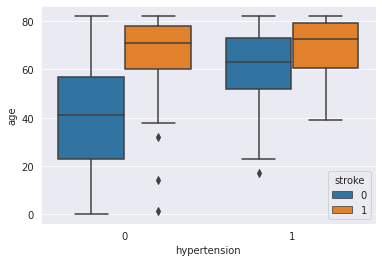

In [17]:
sns.boxplot(x='hypertension',y='age',data=train,hue = 'stroke')

<AxesSubplot:xlabel='hypertension', ylabel='bmi'>

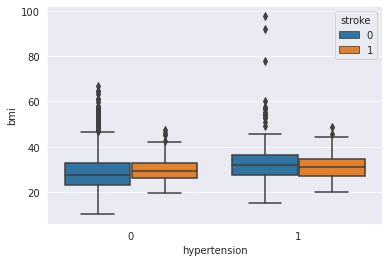

In [18]:
sns.boxplot(x='hypertension',y='bmi',data=train,hue = 'stroke')

<AxesSubplot:xlabel='gender', ylabel='age'>

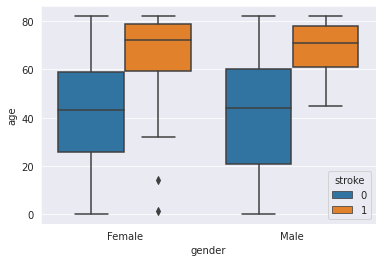

In [19]:
sns.boxplot(x='gender',y='age',data=train,hue = 'stroke')

male and female equally distributed, it seems female can have danger of strokes from early age

<AxesSubplot:xlabel='gender', ylabel='bmi'>

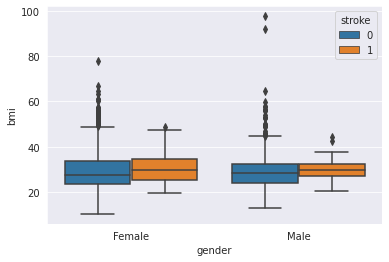

In [20]:
sns.boxplot(x='gender',y='bmi',data=train,hue = 'stroke')

<AxesSubplot:xlabel='ever_married', ylabel='age'>

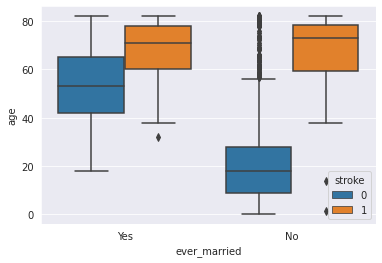

In [21]:
sns.boxplot(x='ever_married',y='age',data=train,hue = 'stroke')

<AxesSubplot:xlabel='work_type', ylabel='age'>

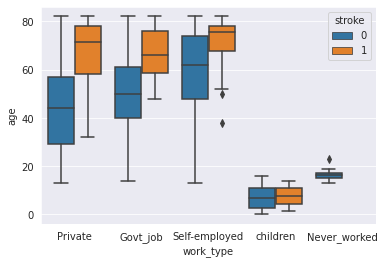

In [22]:
sns.boxplot(x='work_type',y='age',data=train,hue = 'stroke')

<AxesSubplot:xlabel='Residence_type', ylabel='age'>

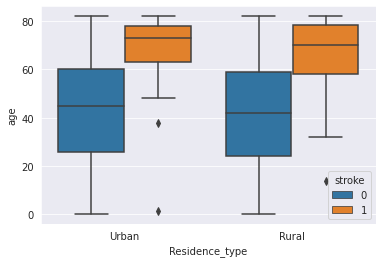

In [23]:
sns.boxplot(x='Residence_type',y='age',data=train,hue = 'stroke')

<AxesSubplot:xlabel='smoking_status', ylabel='age'>

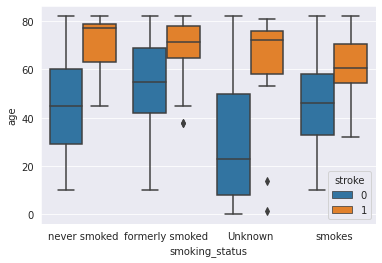

In [24]:
sns.boxplot(x='smoking_status',y='age',data=train,hue = 'stroke')

<AxesSubplot:xlabel='work_type', ylabel='count'>

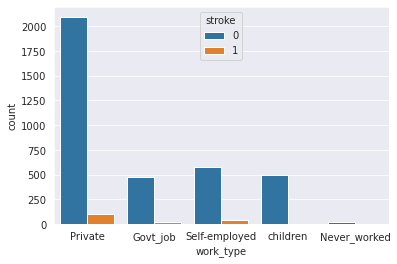

In [25]:
sns.countplot(x='work_type',data=train,hue = 'stroke')

In [26]:
train[train['stroke']==1]['work_type'].value_counts()/train['work_type'].value_counts()

Govt_job         0.046000
Never_worked          NaN
Private          0.045558
Self-employed    0.071082
children         0.004016
Name: work_type, dtype: float64

never_worked -> outlier

In [27]:
train[train['stroke']==1]['smoking_status'].value_counts()/train['smoking_status'].value_counts()

Unknown            0.028796
formerly smoked    0.065379
never smoked       0.043539
smokes             0.050934
Name: smoking_status, dtype: float64

<AxesSubplot:>

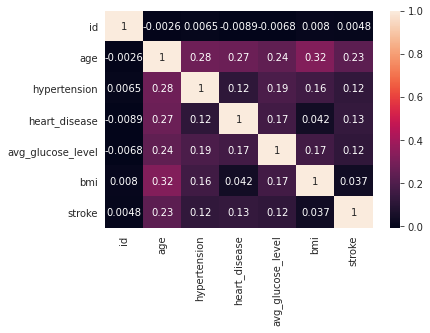

In [28]:
sns.heatmap(train.corr(),annot = True)

In [29]:
from sklearn.base import BaseEstimator, TransformerMixin

class meanImputer(BaseEstimator,TransformerMixin):
    def __init__(self,column,impute):
        self.column = column
        self.impute = impute
        self.mean = 0
    
    def fit(self,X):
        gb = X.groupby(self.column)
        self.mean = gb.mean()[self.impute]
        return self
    
    def tranform(self,X):
        X[self.impute] = X[[self.impute,self.column]].apply(self.imputer,result_type='expand',axis=1)
        return X
    def imputer(self,k):
        print(k)
        if(np.isnan(k[0])):
            return self.mean[k[1]]
        return k[0]
    

In [30]:
imp = meanImputer('gender','bmi')

imp.fit(train)

meanImputer(column='gender', impute='bmi')

In [31]:
check = imp.tranform(train)

bmi         43.7
gender    Female
Name: 4505, dtype: object
bmi       28.5
gender    Male
Name: 3576, dtype: object
bmi       30.5
gender    Male
Name: 3032, dtype: object
bmi         27.8
gender    Female
Name: 1867, dtype: object
bmi         39.7
gender    Female
Name: 494, dtype: object
bmi       37.9
gender    Male
Name: 4139, dtype: object
bmi         24.9
gender    Female
Name: 4739, dtype: object
bmi         35.8
gender    Female
Name: 1859, dtype: object
bmi         17.6
gender    Female
Name: 1164, dtype: object
bmi       27.9
gender    Male
Name: 1323, dtype: object
bmi         38.7
gender    Female
Name: 1270, dtype: object
bmi         45.0
gender    Female
Name: 1873, dtype: object
bmi       35.1
gender    Male
Name: 1615, dtype: object
bmi         45.4
gender    Female
Name: 2282, dtype: object
bmi       53.8
gender    Male
Name: 2330, dtype: object
bmi       32.8
gender    Male
Name: 618, dtype: object
bmi         32.4
gender    Female
Name: 2998, dtype: object
bmi       

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


In [32]:
check.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3832 entries, 4505 to 860
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 3832 non-null   int64  
 1   gender             3832 non-null   object 
 2   age                3832 non-null   float64
 3   hypertension       3832 non-null   int64  
 4   heart_disease      3832 non-null   int64  
 5   ever_married       3832 non-null   object 
 6   work_type          3832 non-null   object 
 7   Residence_type     3832 non-null   object 
 8   avg_glucose_level  3832 non-null   float64
 9   bmi                3832 non-null   float64
 10  smoking_status     3832 non-null   object 
 11  stroke             3832 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 518.2+ KB
